# Trabalho 3 - Laboratório prático

#### Edgar Basto n. 93575

## Exercício - MovieLens 1M

### MovieLens 1M Dataset

GroupLens Research (http://www.grouplens.org/node/73) tem um repositório com vários datasets de "movie ratings data" de utilizadores de entre o fim da década de 90 e início da última década do século XX. 

Nos dados encontramos: movie ratings, metadata (géneros - genre e anos - year) e dados demográficos (age, zip code, gender, occupation). Este datset _MovieLens 1M_ data contém 1 milhão de ratings de 6000 utilizadores acerca de 4000 filmes. Consiste em 3 tabelas: ratings, user information, e movie information. 


In [211]:
import pandas as pd
import numpy as np

# Make display smaller
pd.options.display.max_rows = 10 

uDset = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::',
                        header=None, names=uDset, engine='python')

rDset = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::',
                        header=None, names=rDset, engine='python')

mDset = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::',
                       header=None, names=mDset, engine='python')

In [212]:
print('Users')
users[:5]


Users


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [213]:
print('Ratings')
ratings[:5]


Ratings


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [214]:
print('Movies')
movies[:5]

Movies


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


- Combinar ratings, users e filmes numa nova tabela:

In [215]:
comb = pd.merge(ratings, movies, left_on='movie_id', right_on='movie_id')
dataset = pd.merge(users, comb, left_on='user_id', right_on='user_id')
dataset

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1150,5,956715569,"Return of Martin Guerre, The (Retour de Martin...",Drama
1000205,6040,M,25,6,11106,2751,1,956716438,From the Hip (1987),Comedy
1000206,6040,M,25,6,11106,3289,5,956704305,Not One Less (Yi ge dou bu neng shao) (1999),Drama
1000207,6040,M,25,6,11106,722,3,960971992,"Haunted World of Edward D. Wood Jr., The (1995)",Documentary


- Informação geral sobre a tabela:

In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   gender      1000209 non-null  object
 2   age         1000209 non-null  int64 
 3   occupation  1000209 non-null  int64 
 4   zip         1000209 non-null  object
 5   movie_id    1000209 non-null  int64 
 6   rating      1000209 non-null  int64 
 7   timestamp   1000209 non-null  int64 
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [217]:
dataset.shape

(1000209, 10)

- Data Understanding - informação mais detalhada acerca das variáveis:

In [218]:
dataset.describe(include='all')

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
count,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1000209
unique,NaN,2,NaN,NaN,3439,NaN,NaN,NaN,3706,301
top,NaN,M,NaN,NaN,94110,NaN,NaN,NaN,American Beauty (1999),Comedy
freq,NaN,753769,NaN,NaN,3802,NaN,NaN,NaN,3428,116883
mean,3.024512e+03,NaN,2.973831e+01,8.036138e+00,NaN,1.865540e+03,3.581564e+00,9.722437e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
min,1.000000e+00,NaN,1.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,9.567039e+08,NaN,NaN
25%,1.506000e+03,NaN,2.500000e+01,2.000000e+00,NaN,1.030000e+03,3.000000e+00,9.653026e+08,NaN,NaN
50%,3.070000e+03,NaN,2.500000e+01,7.000000e+00,NaN,1.835000e+03,4.000000e+00,9.730180e+08,NaN,NaN
75%,4.476000e+03,NaN,3.500000e+01,1.400000e+01,NaN,2.770000e+03,4.000000e+00,9.752209e+08,NaN,NaN


- Que informação (que tipo de colunas/formatos está a ser detalhado)?

No que se segue, se necessário, pode consultar 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

1. Descreva apenas as variáveis numericas
2. Descreva apenas os valores de 'rating'
3. Descreva apenas as categóricas
4. Como pode obter a informação de frequências/contagem de ocorrências de valores numa coluna ('genre')? 
5. Relembre o exemplo da precipitação no módulo 3 para visualizar um histograma desses valores.


In [219]:
dataset['rating'].describe() #2.Descreva apenas os valores de 'rating'

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [220]:
dataset.select_dtypes(include='object').describe() #3.Descreva apenas as categóricas
#As variáveis categóricas ainda não estão definidas com o dtype=category

,gender,zip,title,genres
count,1000209,1000209,1000209,1000209
unique,2,3439,3706,301
top,M,94110,American Beauty (1999),Comedy
freq,753769,3802,3428,116883


In [221]:
#4.Como pode obter a informação de frequências/contagem de ocorrências de valores numa coluna ('genre')?
dataset['genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: genres, Length: 301, dtype: int64

In [222]:
dataset['genres']

0                                 Drama
1          Animation|Children's|Musical
2                       Musical|Romance
3                                 Drama
4           Animation|Children's|Comedy
                       ...             
1000204                           Drama
1000205                          Comedy
1000206                           Drama
1000207                     Documentary
1000208                           Drama
Name: genres, Length: 1000209, dtype: object

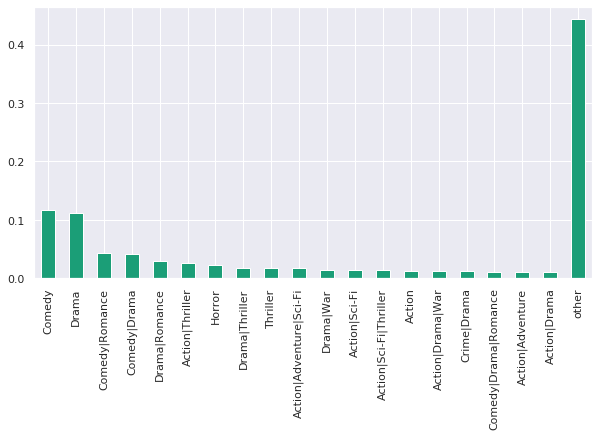

In [223]:
#5.Relembre o exemplo da precipitação no módulo 3 para visualizar um histograma desses valores.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot style


prob = dataset['genres'].value_counts(normalize=True)
threshold = 0.010
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar', colormap="Dark2", figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

- Construa uma nova DataFrame que use como índices os nomes dos fimes.

In [224]:
df = dataset.set_index('title')
df

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,genres
title,,,,,,,,,
One Flew Over the Cuckoo's Nest (1975),1,F,1,10,48067,1193,5,978300760,Drama
James and the Giant Peach (1996),1,F,1,10,48067,661,3,978302109,Animation|Children's|Musical
My Fair Lady (1964),1,F,1,10,48067,914,3,978301968,Musical|Romance
Erin Brockovich (2000),1,F,1,10,48067,3408,4,978300275,Drama
"Bug's Life, A (1998)",1,F,1,10,48067,2355,5,978824291,Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",6040,M,25,6,11106,1150,5,956715569,Drama
From the Hip (1987),6040,M,25,6,11106,2751,1,956716438,Comedy
Not One Less (Yi ge dou bu neng shao) (1999),6040,M,25,6,11106,3289,5,956704305,Drama


- Extrair dos dados uma DataFrame com 'genres', 'rating' e 'gender'.


In [225]:
df[['genres', 'rating', 'gender']]

,genres,rating,gender
title,,,
One Flew Over the Cuckoo's Nest (1975),Drama,5,F
James and the Giant Peach (1996),Animation|Children's|Musical,3,F
My Fair Lady (1964),Musical|Romance,3,F
Erin Brockovich (2000),Drama,4,F
"Bug's Life, A (1998)",Animation|Children's|Comedy,5,F
...,...,...,...
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",Drama,5,M
From the Hip (1987),Comedy,1,M
Not One Less (Yi ge dou bu neng shao) (1999),Drama,5,M


- Verificar quais os 10 fimes mais vistos por utilizadores F.


1. Extrair uma DataFrame da anterior apenas com os filmes visto por utilizadores F.

In [226]:
df[df['gender'] == 'F']

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,genres
title,,,,,,,,,
One Flew Over the Cuckoo's Nest (1975),1,F,1,10,48067,1193,5,978300760,Drama
James and the Giant Peach (1996),1,F,1,10,48067,661,3,978302109,Animation|Children's|Musical
My Fair Lady (1964),1,F,1,10,48067,914,3,978301968,Musical|Romance
Erin Brockovich (2000),1,F,1,10,48067,3408,4,978300275,Drama
"Bug's Life, A (1998)",1,F,1,10,48067,2355,5,978824291,Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...
Shall We Dance? (1937),6039,F,45,0,01060,1066,3,956705470,Comedy|Musical|Romance
You Can't Take It With You (1938),6039,F,45,0,01060,1934,5,956705636,Comedy
Evita (1996),6039,F,45,0,01060,1416,4,956706075,Drama|Musical


Top 10 Filmes mais vistos por utilizadores F

In [227]:
topFemaleMovies = dataset[dataset['gender'] == 'F'].groupby('title').size().sort_values(ascending=False).head(10)
topFemaleMovies

title
American Beauty (1999)                                   946
Shakespeare in Love (1998)                               798
Silence of the Lambs, The (1991)                         706
Sixth Sense, The (1999)                                  664
Groundhog Day (1993)                                     658
Fargo (1996)                                             657
Star Wars: Episode VI - Return of the Jedi (1983)        653
Star Wars: Episode V - The Empire Strikes Back (1980)    648
Star Wars: Episode IV - A New Hope (1977)                647
Forrest Gump (1994)                                      644
dtype: int64

Top 10 Filmes mais vistos por utilizadores M

In [228]:
topMaleMovies = dataset[dataset['gender'] == 'M'].groupby('title').size().sort_values(ascending=False).head(10)
topMaleMovies

title
American Beauty (1999)                                   2482
Star Wars: Episode IV - A New Hope (1977)                2344
Star Wars: Episode V - The Empire Strikes Back (1980)    2342
Star Wars: Episode VI - Return of the Jedi (1983)        2230
Terminator 2: Judgment Day (1991)                        2193
Jurassic Park (1993)                                     2099
Saving Private Ryan (1998)                               2078
Matrix, The (1999)                                       2076
Men in Black (1997)                                      2000
Back to the Future (1985)                                1944
dtype: int64

2. Agrupar os titulos por visualizações (quantidade de registos por titulo).

In [229]:
countMovies = dataset.groupby('title').size().sort_values(ascending=False)
countMovies

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Anna (1996)                                                 1
McCullochs, The (1975)                                      1
Shadows (Cienie) (1988)                                     1
Night Tide (1961)                                           1
Another Man's Poison (1952)                                 1
Length: 3706, dtype: int64

3. Extrair a Series com os com mais de 500 visualizações.

In [230]:
top500Movies = countMovies[countMovies > 500]
top500Movies

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Alien Nation (1988)                                       504
Body Heat (1981)                                          504
Guns of Navarone, The (1961)                              502
Postino, Il (The Postman) (1994)                          501
Emma (1996)                                               501
Length: 617, dtype: int64

4. Ordenar e mostrar o Top-10.

In [231]:
top10Movies = countMovies.head(10)
top10Movies

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

Top 10 filmes de Comédia

In [232]:
top10Comedy = dataset[dataset['genres'].str.contains('Comedy')].head(10)
top10Comedy

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
5,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
7,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
13,1,F,1,10,48067,2918,4,978302124,Ferris Bueller's Day Off (1986),Comedy
15,1,F,1,10,48067,2791,4,978302188,Airplane! (1980),Comedy
19,1,F,1,10,48067,2797,4,978302039,Big (1988),Comedy|Fantasy
20,1,F,1,10,48067,2321,3,978302205,Pleasantville (1998),Comedy
22,1,F,1,10,48067,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi
29,1,F,1,10,48067,745,3,978824268,"Close Shave, A (1995)",Animation|Comedy|Thriller
32,1,F,1,10,48067,1566,4,978824330,Hercules (1997),Adventure|Animation|Children's|Comedy|Musical


In [233]:
dataset.groupby('title').size()

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

### Top Rated Movies

In [234]:
topRatedMovies = dataset.groupby('title').agg({'rating': [np.size, np.mean]})
topRatedMovies

rating          
                                             size      mean
title                                                      
$1,000,000 Duck (1971)                         37  3.027027
'Night Mother (1986)                           70  3.371429
'Til There Was You (1997)                      52  2.692308
'burbs, The (1989)                            303  2.910891
...And Justice for All (1979)                 199  3.713568
...                                           ...       ...
Zed & Two Noughts, A (1985)                    29  3.413793
Zero Effect (1998)                            301  3.750831
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2  3.500000
Zeus and Roxanne (1997)                        23  2.521739
eXistenZ (1999)                               410  3.256098

[3706 rows x 2 columns]

In [235]:
topRatedMovies.columns

MultiIndex([('rating', 'size'),
            ('rating', 'mean')],
           )

Identificar a quantidade média de ratings, para não considerarmos filmes com poucas avaliações

In [236]:
topRatedMovies[('rating', 'size')].mean()

269.88909875876953

In [237]:
topRatedMovies[topRatedMovies[('rating', 'size')] > 270].sort_values(('rating', 'mean'), ascending=False) 

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
...                                                   ...       ...
Grease 2 (1982)                                       303  1.963696
Superman IV: The Quest for Peace (1987)               332  1.888554
Super Mario Bros. (1993)                              350  1.874286
Speed 2: Cruise Control (1997)                        367  1.871935
Battlefield Earth (2000)                              342  1.611111

[1145 rows x 2 columns]

In [238]:
top10RatedMovies = topRatedMovies[topRatedMovies[('rating', 'size')] > 270].sort_values(('rating', 'mean'), ascending=False).head(10)
top10RatedMovies

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190

### Extração do ano do filme para uma coluna nova

Expressão regex: (([1-2][0-9]{3})) Significa que procuramos:

algo na string entre ()
que comece por 1 ou 2, para identificar os anos 1xxx e 2xxx
que os 3 subsequentes caratéres sejam algarismos que podem ir de 0 a 9

In [239]:
dataset['title'].str.extract(r'\(([1-2][0-9]{3})\)').rename(columns={0:'year'})

,year
0,1975
1,1996
2,1964
3,2000
4,1998
...,...
1000204,1982
1000205,1987
1000206,1999
1000207,1995


In [240]:
dataset['year'] = dataset['title'].str.extract(r'\(([1-2][0-9]{3})\)')
dataset

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1996
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance,1964
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama,2000
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1150,5,956715569,"Return of Martin Guerre, The (Retour de Martin...",Drama,1982
1000205,6040,M,25,6,11106,2751,1,956716438,From the Hip (1987),Comedy,1987
1000206,6040,M,25,6,11106,3289,5,956704305,Not One Less (Yi ge dou bu neng shao) (1999),Drama,1999
1000207,6040,M,25,6,11106,722,3,960971992,"Haunted World of Edward D. Wood Jr., The (1995)",Documentary,1995


In [241]:
dataset[dataset['year'].isna()] #verificação se há algum título sem ano

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year


### Contagem do número de filmes produzidos por ano

In [242]:
uniqueMovies = pd.DataFrame(dataset['title'].unique(), columns=['title'])
uniqueMovies

,title
0,One Flew Over the Cuckoo's Nest (1975)
1,James and the Giant Peach (1996)
2,My Fair Lady (1964)
3,Erin Brockovich (2000)
4,"Bug's Life, A (1998)"
...,...
3701,Modulations (1998)
3702,Broken Vessels (1998)
3703,White Boys (1999)
3704,One Little Indian (1973)


In [243]:
uniqueMovies['year'] = uniqueMovies['title'].str.extract(r'\(([1-2][0-9]{3})\)')
uniqueMovies

,title,year
0,One Flew Over the Cuckoo's Nest (1975),1975
1,James and the Giant Peach (1996),1996
2,My Fair Lady (1964),1964
3,Erin Brockovich (2000),2000
4,"Bug's Life, A (1998)",1998
...,...,...
3701,Modulations (1998),1998
3702,Broken Vessels (1998),1998
3703,White Boys (1999),1999
3704,One Little Indian (1973),1973


In [244]:
moviesPerYear = uniqueMovies['year'].value_counts().sort_values()
print(moviesPerYear)
print(type(moviesPerYear))

1920      1
1921      1
1922      1
1923      2
1929      2
       ... 
1999    271
1997    304
1995    312
1996    312
1998    317
Name: year, Length: 81, dtype: int64
<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Frequência (Y)')

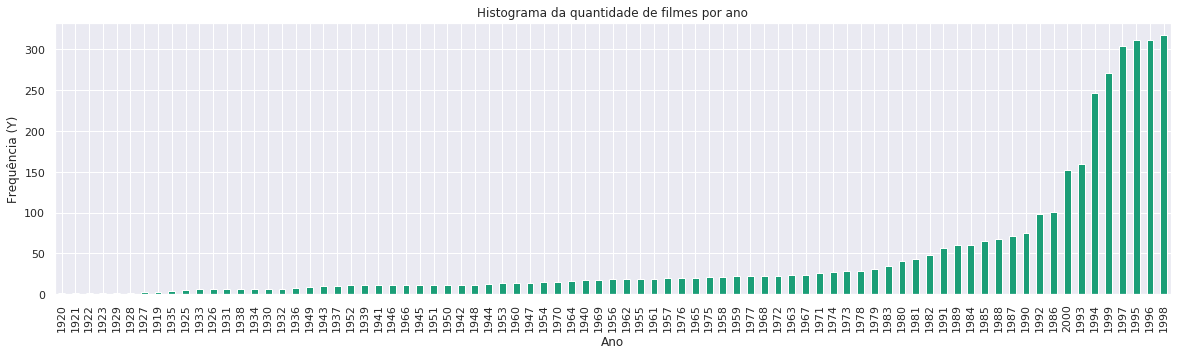

In [245]:
moviesPerYear.plot(kind='bar', colormap="Dark2", figsize=(20,5), title='Histograma da quantidade de filmes por ano')
plt.xlabel('Ano')
plt.ylabel('Frequência (Y)')

### Lista de Géneros únicos

In [246]:
uniqueGenres = pd.DataFrame(dataset['genres'].unique(), columns=['genres'])
print(uniqueGenres)
print(len(uniqueGenres))
print(type(uniqueGenres))

                              genres
0                              Drama
1       Animation|Children's|Musical
2                    Musical|Romance
3        Animation|Children's|Comedy
4    Action|Adventure|Comedy|Romance
..                               ...
296            Drama|Romance|Western
297                  Romance|Western
298        Comedy|Film-Noir|Thriller
299                          Fantasy
300                 Film-Noir|Horror

[301 rows x 1 columns]
301
<class 'pandas.core.frame.DataFrame'>


In [247]:
genresCount = pd.DataFrame(columns=['genre', 'count'])

In [248]:
for j in uniqueGenres['genres'].str.split('|').values:
    for i in j:
        if i not in genresCount['genre'].values:
            genresCount = genresCount.append({'genre': i, 'count': 1}, ignore_index=True)
        else:
            t = 0
            t = genresCount[genresCount['genre'] == i]['count'].values[0]
            genresCount.at[genresCount['genre'] == i, 'count'] = t+1 

In [249]:
genresCount.shape

(18, 2)

In [250]:
genresCount.sort_values(by='count', ascending=False)

,genre,count
6,Action,96
5,Comedy,86
7,Adventure,86
0,Drama,78
11,Thriller,77
...,...,...
15,Horror,30
1,Animation,29
16,Film-Noir,18
14,Western,17


In [251]:
#!pip install wordcloud

In [252]:
from wordcloud import WordCloud

In [253]:
#?WordCloud

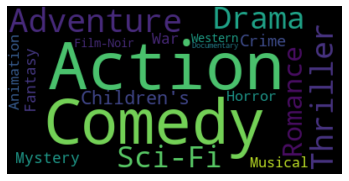

In [254]:
wordcloud = WordCloud(background_color='black').generate_from_frequencies(dict(genresCount.values))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Total de filmes por género e por ano.

Nota: Há vários filmes que foram catalogados em vários géneros. Por isso a soma acumulada poderá não ser igual ao total de filmes produzidos num dado ano.

In [255]:
movieYear = dataset[['movie_id', 'year']].groupby('year')
movieYear.head()
genresPerYear = pd.DataFrame({'moviesProduced': movieYear['movie_id'].nunique().cumsum()})
genresPerYear

,moviesProduced
year,
1919,3
1920,4
1921,5
1922,6
1923,8
...,...
1996,2662
1997,2966
1998,3283


In [256]:
dataset['genres'].str.get_dummies().astype(bool)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1000205,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1000206,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1000207,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [257]:
dataset = dataset.join(dataset['genres'].str.get_dummies().astype(bool))
dataset

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,...,False,False,False,False,False,False,False,False,False,False
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,...,False,False,False,True,False,False,False,False,False,False
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance,...,False,False,False,True,False,True,False,False,False,False
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama,...,False,False,False,False,False,False,False,False,False,False
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1150,5,956715569,"Return of Martin Guerre, The (Retour de Martin...",Drama,...,False,False,False,False,False,False,False,False,False,False
1000205,6040,M,25,6,11106,2751,1,956716438,From the Hip (1987),Comedy,...,False,False,False,False,False,False,False,False,False,False
1000206,6040,M,25,6,11106,3289,5,956704305,Not One Less (Yi ge dou bu neng shao) (1999),Drama,...,False,False,False,False,False,False,False,False,False,False
1000207,6040,M,25,6,11106,722,3,960971992,"Haunted World of Edward D. Wood Jr., The (1995)",Documentary,...,False,False,False,False,False,False,False,False,False,False


In [258]:
for i in genresCount['genre']:
    movieYear = dataset[dataset[i]][['movie_id', 'year']].groupby('year')
    genresPerYear[i] = movieYear['movie_id'].nunique().cumsum()

In [259]:
genresPerYear

,moviesProduced,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
year,,,,,,,,,,,,,,,,,,,
1919,3,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1923,8,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2662,1034.0,76.0,190.0,103.0,297.0,789.0,365.0,231.0,57.0,216.0,120.0,315.0,133.0,73.0,65.0,292.0,39.0,64.0
1997,2966,1165.0,82.0,212.0,108.0,349.0,885.0,408.0,253.0,63.0,233.0,130.0,370.0,159.0,88.0,NaN,302.0,41.0,75.0
1998,3283,1317.0,90.0,230.0,111.0,406.0,993.0,451.0,269.0,65.0,249.0,135.0,421.0,181.0,98.0,66.0,317.0,44.0,91.0


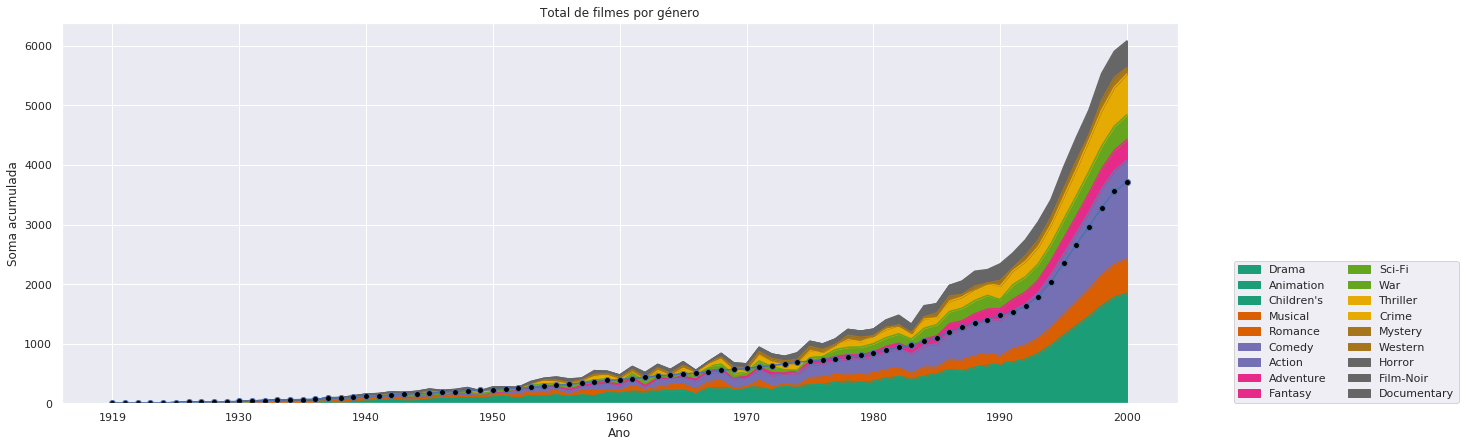

In [260]:
genresPerYear.loc[:,genresPerYear.columns!='moviesProduced'].plot.area(stacked=True, colormap="Dark2", figsize=(20,7))
plt.plot(genresPerYear['moviesProduced'], marker='o', markerfacecolor='black')
plt.title('Total de filmes por género')
plt.xlabel('Ano')
plt.ylabel('Soma acumulada')
plt.legend(loc=(1.05,0), ncol=2)
plt.show()

### Análise das profissões por género dos utilizadores que contribuiram para este dataset

In [261]:
dataset[['user_id', 'gender', 'occupation']].nunique()

user_id       6040
gender           2
occupation      21
dtype: int64

In [262]:
usersInfo = dataset[['user_id', 'gender', 'occupation']].copy()
usersInfo

,user_id,gender,occupation
0,1,F,10
1,1,F,10
2,1,F,10
3,1,F,10
4,1,F,10
...,...,...,...
1000204,6040,M,6
1000205,6040,M,6
1000206,6040,M,6
1000207,6040,M,6


In [263]:
usersInfo.drop_duplicates(inplace=True)
usersInfo

,user_id,gender,occupation
0,1,F,10
53,2,M,16
182,3,M,15
233,4,M,7
254,5,M,20
...,...,...,...
998635,6036,F,15
999523,6037,F,1
999725,6038,F,1
999745,6039,F,0


In [264]:
usersInfo['occupation'].value_counts()

4     759
0     711
7     679
1     528
17    502
     ... 
5     112
9      92
19     72
18     70
8      17
Name: occupation, Length: 21, dtype: int64

In [265]:
usersInfo = usersInfo.set_index('user_id')
usersInfo

,gender,occupation
user_id,,
1,F,10
2,M,16
3,M,15
4,M,7
5,M,20
...,...,...
6036,F,15
6037,F,1
6038,F,1


In [266]:
usersInfo['occupation'].dtype

dtype('int64')

Conversão da 'occupation' para uma variável categórica e renomear as categorias.

In [267]:
usersInfo['occupation'] = pd.Categorical(usersInfo['occupation']) #conversão para uma variável categórica

In [268]:
usersInfo['occupation'].cat.rename_categories({0:  'other', 1:  'academic/educator', 2:  'artist', 
                                               3:  'clerical/admin', 4:  'college/grad student', 
                                               5:  'customer service', 6:  'doctor/health care', 
                                               7:  'executive/managerial', 8:  'farmer', 9:  'homemaker', 
                                               10:  'K-12 student', 11:  'lawyer', 12:  'programmer', 
                                               13:  'retired', 14:  'sales/marketing', 15:  'scientist', 
                                               16:  'self-employed', 17:  'technician/engineer', 
                                               18:  'tradesman/craftsman', 19:  'unemployed', 20:  'writer'}, inplace=True)

In [269]:
usersInfo['occupation'].value_counts().sort_values()

farmer                   17
tradesman/craftsman      70
unemployed               72
homemaker                92
customer service        112
                       ... 
technician/engineer     502
academic/educator       528
executive/managerial    679
other                   711
college/grad student    759
Name: occupation, Length: 21, dtype: int64

In [270]:
occupationPerGender = usersInfo.groupby(['occupation', 'gender']).occupation.count().unstack()
occupationPerGender

gender,F,M
occupation,,
other,232,479
academic/educator,209,319
artist,91,176
clerical/admin,100,73
college/grad student,234,525
...,...,...
self-employed,51,190
technician/engineer,52,450
tradesman/craftsman,4,66


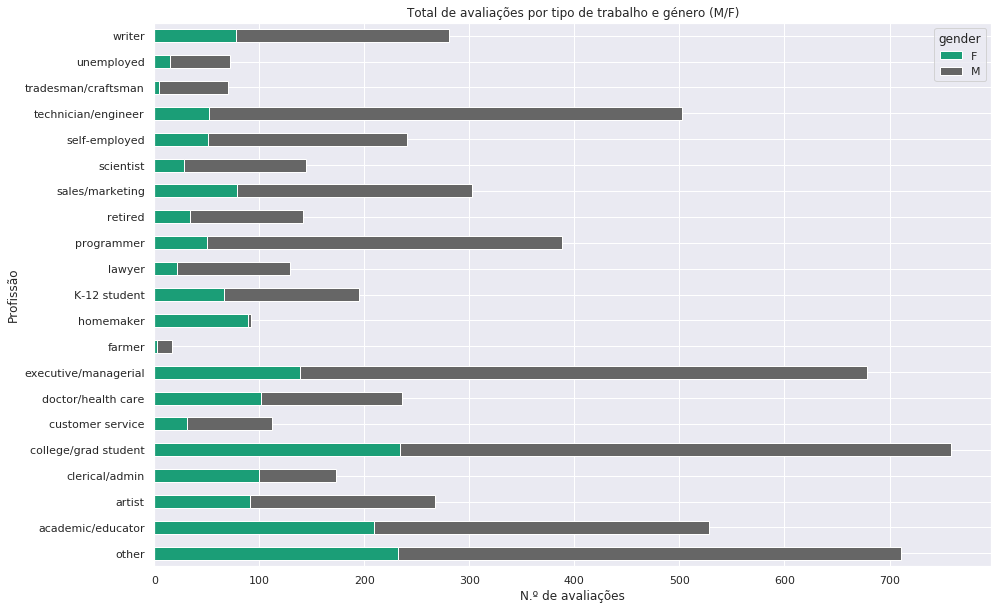

In [271]:
occupationPerGender.plot(kind='barh', stacked=True, colormap="Dark2", figsize=(15,10))
plt.title('Total de avaliações por tipo de trabalho e género (M/F)')
plt.xlabel('N.º de avaliações')
plt.ylabel('Profissão')
plt.show()

### Heatmap das avaliações por profissão

In [272]:
heatmap = pd.DataFrame(dataset['occupation'].unique(), columns=['occupation']).copy()
heatmap.sort_values('occupation', inplace=True)
heatmap.set_index(['occupation'], inplace=True)
heatmap

""
occupation
0
1
2
3
4
...
16
17
18


In [273]:
for i in genresCount['genre']:    
    heatmap[i] = dataset[dataset[i] == True].groupby('occupation')['rating'].mean()
heatmap

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
occupation,,,,,,,,,,,,,,,,,,
0,3.743350,3.675085,3.438571,3.657419,3.573987,3.492602,3.417847,3.425616,3.426315,3.399847,3.852334,3.494616,3.652772,3.593786,3.620441,3.131202,4.058155,3.854545
1,3.754293,3.693399,3.459286,3.701586,3.605972,3.519583,3.392063,3.424278,3.456388,3.396863,3.882950,3.526184,3.659342,3.685255,3.629738,3.104548,4.082613,3.984887
2,3.732216,3.624133,3.377481,3.613322,3.588446,3.504449,3.457569,3.443535,3.424432,3.500281,3.859375,3.564667,3.678039,3.719645,3.610483,3.243743,4.114000,4.028933
3,3.790601,3.822104,3.609614,3.857049,3.704607,3.601516,3.549025,3.556486,3.472675,3.555942,3.927692,3.645559,3.742811,3.750000,3.626707,3.304525,4.075332,3.852632
4,3.748794,3.655628,3.346680,3.642227,3.558452,3.486563,3.453687,3.419877,3.363636,3.419123,3.864107,3.514386,3.723450,3.575105,3.519847,3.166907,4.039548,3.962887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,3.791983,3.729696,3.457459,3.678006,3.612211,3.507570,3.510326,3.513258,3.494278,3.493593,3.926107,3.571828,3.737569,3.702542,3.606457,3.266436,4.105583,3.933492
17,3.800158,3.734375,3.481277,3.659684,3.662824,3.581290,3.567827,3.560600,3.528097,3.529858,3.939708,3.624165,3.713289,3.668352,3.662614,3.208789,4.050861,4.024129
18,3.738553,3.748663,3.395288,3.475949,3.516854,3.445350,3.475220,3.430316,3.420833,3.473520,3.873449,3.568896,3.635569,3.631250,3.753205,3.341662,3.882653,3.640000


In [274]:
heatmap.index = ['other', 'academic/educator', 'artist', 'clerical/admin', 'college/grad student', 'customer service', 'doctor/health care', 'executive/managerial', 'farmer', 'homemaker', 'K-12 student', 'lawyer', 'programmer', 'retired', 'sales/marketing', 'scientist', 'self-employed', 'technician/engineer', 'tradesman/craftsman', 'unemployed', 'writer']

In [275]:
heatmap

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
other,3.743350,3.675085,3.438571,3.657419,3.573987,3.492602,3.417847,3.425616,3.426315,3.399847,3.852334,3.494616,3.652772,3.593786,3.620441,3.131202,4.058155,3.854545
academic/educator,3.754293,3.693399,3.459286,3.701586,3.605972,3.519583,3.392063,3.424278,3.456388,3.396863,3.882950,3.526184,3.659342,3.685255,3.629738,3.104548,4.082613,3.984887
artist,3.732216,3.624133,3.377481,3.613322,3.588446,3.504449,3.457569,3.443535,3.424432,3.500281,3.859375,3.564667,3.678039,3.719645,3.610483,3.243743,4.114000,4.028933
clerical/admin,3.790601,3.822104,3.609614,3.857049,3.704607,3.601516,3.549025,3.556486,3.472675,3.555942,3.927692,3.645559,3.742811,3.750000,3.626707,3.304525,4.075332,3.852632
college/grad student,3.748794,3.655628,3.346680,3.642227,3.558452,3.486563,3.453687,3.419877,3.363636,3.419123,3.864107,3.514386,3.723450,3.575105,3.519847,3.166907,4.039548,3.962887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
self-employed,3.791983,3.729696,3.457459,3.678006,3.612211,3.507570,3.510326,3.513258,3.494278,3.493593,3.926107,3.571828,3.737569,3.702542,3.606457,3.266436,4.105583,3.933492
technician/engineer,3.800158,3.734375,3.481277,3.659684,3.662824,3.581290,3.567827,3.560600,3.528097,3.529858,3.939708,3.624165,3.713289,3.668352,3.662614,3.208789,4.050861,4.024129
tradesman/craftsman,3.738553,3.748663,3.395288,3.475949,3.516854,3.445350,3.475220,3.430316,3.420833,3.473520,3.873449,3.568896,3.635569,3.631250,3.753205,3.341662,3.882653,3.640000
unemployed,3.619308,3.395221,2.973435,3.360771,3.451581,3.401392,3.310577,3.287975,3.230900,3.330855,3.693103,3.403038,3.634085,3.579734,3.501779,3.136126,4.044444,3.727273


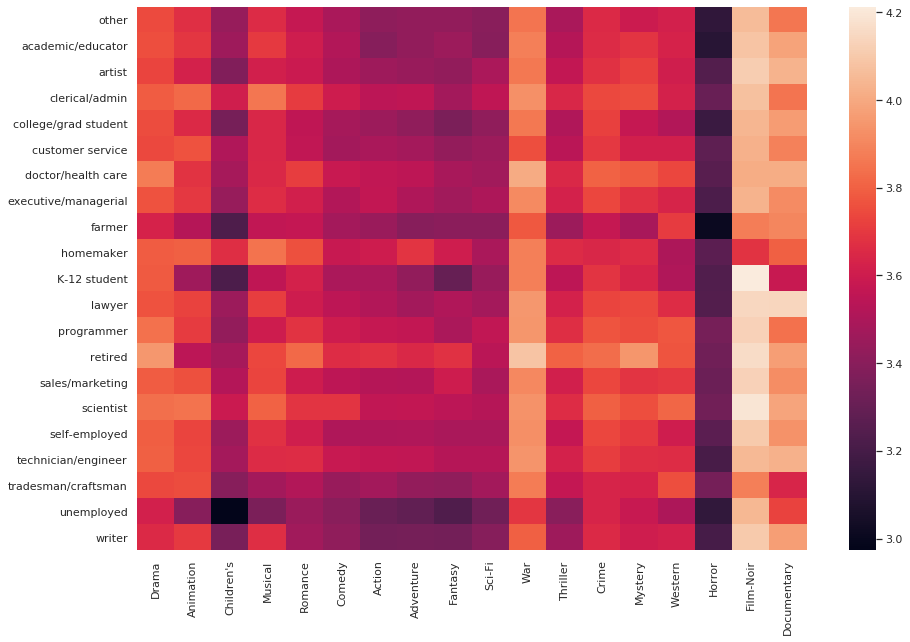

In [276]:
plt.subplots(figsize=(15,10))
seaborn.heatmap(heatmap, annot=False)